# Libraries

In [1]:
import os
import datetime
import regex as re
import glob
import requests
import time
from bs4 import BeautifulSoup
from collections import defaultdict, Counter
import random
import shutil
from pathlib import Path
from datetime import datetime
import pandas as pd
import html
import numpy as np
import nltk
nltk.download('stopwords')
from string import punctuation
stopwords = set(nltk.corpus.stopwords.words('english'))

## For Modeling 
from tqdm.auto import tqdm

import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim_models as gensimvis
import gensim

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

from spacy.lang.en.stop_words import STOP_WORDS as stopwords

from collections import Counter, defaultdict

nlp = spacy.load('en_core_web_sm')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clairephibbs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## For Summer's Computer - have to add this to avoid an error with stopwords import 
#import ssl 
# Disable SSL certificate verification
#ssl._create_default_https_context = ssl._create_unverified_context

#nltk.download('stopwords')

# Scraping Data

## Get Links

In [3]:
years = {'year07':"https://arlweb.msha.gov/fatals/indices/FABM2007.asp",
         'year06':"https://arlweb.msha.gov/fatals/indices/FABM2006.asp",
         'year05':"https://arlweb.msha.gov/fatals/indices/FABM2005.asp",
         'year04':"https://arlweb.msha.gov/fatals/indices/FABM2004.HTM",
         'year03':"https://arlweb.msha.gov/fatals/indices/FABM2003.HTM",
         'year02':"https://arlweb.msha.gov/fatals/indices/FABM2002.HTM",
         'year01':"https://arlweb.msha.gov/fatals/indices/FABM2001.HTM",
         'year00':"https://arlweb.msha.gov/fatals/indices/FABM2000.HTM",
         'year99':"https://arlweb.msha.gov/fatals/indices/FABM99.HTM",
         'year98':"https://arlweb.msha.gov/fatals/indices/FABM98.HTM",
         'year97':"https://arlweb.msha.gov/fatals/indices/FABM97.HTM",
         'year96':"https://arlweb.msha.gov/fatals/indices/FABM96.HTM",
         'year95':"https://arlweb.msha.gov/fatals/indices/FABM95.HTM",
        } 

In [4]:
report_pages = defaultdict(list)
urls = []
start_time = datetime.now()


for year, year_page in years.items() :
    r = requests.get(year_page)
    time.sleep(5 + 10*random.random())
    soup = BeautifulSoup(r.text, 'html.parser')
    links = soup.find_all('a', href=True)
    for link in links:
        if '/FATALS/' and '/FTL' in link['href']:
            urls.append(link.get('href'))
            report_pages[year].append(link.get('href'))
            
end_time = datetime.now()
computation_time = end_time - start_time 
print(f"Started At: {start_time} \nEnded At: {end_time}")     
print(f'Scraping took {computation_time} Minutes')       

Started At: 2023-06-25 19:26:00.269144 
Ended At: 2023-06-25 19:28:25.030960
Scraping took 0:02:24.761816 Minutes


In [5]:
for year, links in report_pages.items() : 
    print(f"For {year} we have {len(links)}.")
    print(f"The full pull will take for this year will take {round(len(links)*10/3600,2)} hours.")

For year07 we have 32.
The full pull will take for this year will take 0.09 hours.
For year06 we have 26.
The full pull will take for this year will take 0.07 hours.
For year05 we have 35.
The full pull will take for this year will take 0.1 hours.
For year04 we have 26.
The full pull will take for this year will take 0.07 hours.
For year03 we have 26.
The full pull will take for this year will take 0.07 hours.
For year02 we have 40.
The full pull will take for this year will take 0.11 hours.
For year01 we have 28.
The full pull will take for this year will take 0.08 hours.
For year00 we have 41.
The full pull will take for this year will take 0.11 hours.
For year99 we have 53.
The full pull will take for this year will take 0.15 hours.
For year98 we have 51.
The full pull will take for this year will take 0.14 hours.
For year97 we have 61.
The full pull will take for this year will take 0.17 hours.
For year96 we have 46.
The full pull will take for this year will take 0.13 hours.
For y

In [6]:
urls = [i for i in urls if not ('19' in i)] ## limiting to links 2000-2007

## Scrape Text to Files

In [7]:
#os.chdir('C:\\Users\\halle.davis\\Downloads\\reports') ## Halle's work folder path
#os.chdir('/Users/halledavis/Desktop/reports') ## Halle's personal folder path
os.chdir('/Users/clairephibbs/Desktop/reports') ## Claire's folder path
#os.chdir('/Users/summerpurschke/Desktop/ADS/ADS509/Final Project') ## Summer's folder path

In [8]:
# ## Run on All Links
# ## This will take an hour to run!!! (Lots of documents)

# url_stub = "https://arlweb.msha.gov/" 
# start_time = datetime.now()

# total_pages = 0 ## used if we want to limit the report number for performance purposes

# path = os.getcwd()

# for x in urls :
#     #if total_pages == 22:   ## used if we want to limit the report number for performance purposes
#     #    break 
#     name0 = x.replace('/', '')
#     name = name0.replace('.HTM', '')
#     name = name.replace('.asp', '')
#     filename = name+".txt"
#     if os.path.exists(filename):
#         file = open(filename, "r+")
#     else:
#         file = open(filename, "w+")
#     try:
#         soup = BeautifulSoup(requests.get(url_stub+x).content, "html.parser")    
#         time.sleep(5 + 10*random.random())
#         report = soup.get_text()
#         #title = soup.title.string
#         file.writelines(report)
#         time.sleep(5 + 10*random.random())
#         total_pages += 1
#     except:
#         pass
    
# end_time = datetime.now()
# print("Started At:", start_time, "\nEnded At:", end_time)

## Download Data to Dataframe

In [9]:
file_list = glob.glob(os.path.join(os.getcwd(), "*.txt"))
start_time = datetime.now()

reports = []

for file_path in file_list:
    with open(file_path) as f_input:
        text = (f_input.read())
        file_name = file_path.split("reports")[-1]
        reports.append(
            {
                'filename': file_name,
                'alltext': text
            }
        )
        
data = pd.DataFrame(reports)

end_time = datetime.now()
print("Started At:", start_time, "\nEnded At:", end_time)

Started At: 2023-06-25 19:28:25.450803 
Ended At: 2023-06-25 19:28:25.597005


# Preprocessing

### Get Title

In [10]:
data['title'] = data.alltext.astype(str).str.extract(r': (.*)')

In [11]:
data.head()

filename  \
0     /FATALS2000FTL00M45.txt   
1  /FATALS2004FTL04m22-23.txt   
2     /FATALS2000FTL00M44.txt   
3     /FATALS2000FTL00M46.txt   
4     /FATALS2000FTL00M47.txt   

                                             alltext  \
0   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
1   \n\n\n\n\n\n\n\n\n\n\n\nMSHA  - Metal/Nonmeta...   
2   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
3   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
4   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   

                                               title  
0   Fatality #45 - Powered Haulage - Limestone (C...  
1  Fatality #22 & 23 - December 05, 2004 -  Falli...  
2   Fatality #44 - November 6, 2000 - Powered Hau...  
3                                    Fatality #46 -   
4   Fatality #47 - November 20, 2000 - Slip/Fall ...

### Get Cause

#### Causes include

ELECTRICAL - Accidents in which electric current is most directly responsible for the resulting accident.

ENTRAPMENT - In accidents involving no injuries or nonfatal injuries which are not serious, entrapment of mine workers takes precedence over roof falls, explosives accidents, inundations, etc. If a roof fall results in an entrapment accident, the accident classification is ï¿½Entrapment.

EXPLODING VESSELS UNDER PRESSURE - These are accidents caused by explosion of air hoses, air tanks, hydraulic lines, hydraulic hoses, and other accidents precipitated by exploding vessels.

EXPLOSIVES AND BREAKING AGENTS - Accidents involving the detonation of manufactured explosives, Airdox, or Cardox, that can cause flying debris, concussive forces, or fumes.

FALLING, ROLLING, OR SLIDING ROCK OR MATERIAL OF ANY KIND -Injuries caused directly by falling material require great care in classification. Remember that it is the accident we want to classify. If material was set in motion by machinery, haulage equipment, or hand tools, or while material is being handled or disturbed, etc., charge the force that set the material in motion. For example, where a rock was pushed over a highwall by a dozer and the rock hit another rock which struck and injured a worker - charge the accident to the dozer. Charge the accident to that which most directly caused the resulting accident. Without the dozer, there would have been no resulting accident. This includes accidents caused by improper blocking of equipment under repair or inspection.

FALL OF FACE, RIB, SIDE OR HIGHWALL - Accidents in this classification include falls of material (from in-place) while barring down or placing props; also pressure bumps and bursts. Since pressure bumps and bursts which cause accidents are infrequent, they are not given a separate category. Not included are accidents in which the motion of machinery or haulage equipment caused the fall either directly or by knocking out support; such accidents are classified as machinery or haulage, whichever is appropriate.

FALL OF ROOF OR BACK - Underground accidents which include falls while barring down or placing props; also pressure bumps and bursts. Not included are accidents in which the motion of machinery or haulage equipment caused the fall either directly or by knocking out support; such falls are classified as machinery or haulage, whichever is appropriate.

FIRE - In underground mines, an unplanned fire not extinguished within 10 minutes of discovery; in surface mines and surface areas of underground mines, an unplanned fire not extinguished within 30 minutes of discovery;

HANDLING MATERIAL - (Lifting, pulling, pushing, shoveling material.) The material may be in bags or boxes, or loose sand, coal, rock, timber, etc. The accident must have been most directly caused by handling material.

HAND TOOLS - Accidents related to non-powered tools when being used as hand tools. Do not include electric tools or air-powered tools.

HOISTING - Damage to hoisting equipment in a shaft or slope which endangers an individual or interferes with use of the equipment for more than 30 minutes. Hoisting may also be the classification where a victim was injured by hoisting equipment but there was no damage to the equipment. Accidents involving cages, skips, buckets, or elevators. The accident results from the action, motion, or failure of the hoisting equipment or mechanism. Included is equipment such as derricks and cranes only when used in shaft sinking; suspended work platforms in shafts; mine cars being lowered or raised by hoisting equipment on slopes or inclines; a skip squeezed between timbers resulting in an accident; or an ore bucket tipped for any reason causing an accident.

IGNITION OR EXPLOSION OF GAS OR DUST - Accidents resulting as a consequence of the ignition or explosion of gas or dust. Included are exploding gasoline vapors, space heaters, or furnaces.
Methane Ignition - A methane ignition occurs when methane burns without producing destructive forces. Damage resulting from an ignition is limited to that caused by flame and heat. Personnel in the immediate vicinity of an ignition may be burned and line brattice or other materials in close proximity may be discolored, melted or burned. Ignitions generally involve small quantities of methane and are usually confined to a small area; however, in the case of methane roof layering, flame spread may be more extensive.
Methane Explosion - A methane explosion occurs when methane is ignited and burns violently. The flame of the explosion accelerates rapidly, heating the environment and causing destructive forces. Evidence of the destructive forces may be manifest on victims, equipment, structures, etc. Witnesses to an explosion may hear the noise generated by the resulting sound pressure wave.

IMPOUNDMENT - An unstable condition at an impoundment, refuse pile, or culm bank which requires emergency action in order to prevent failure, or which causes individuals to evacuate an area. Also the failure of an impoundment, refuse pile, or culm bank.

INUNDATION - An unplanned inundation of a mine by a liquid or gas. The mine may be either a surface or underground operation.

MACHINERY - Accidents that result from the action or motion of machinery or from failure of component parts. Included are all electric and air-powered tools and mining machinery such as drills, tuggers, slushers, draglines, power shovels, loading machines, compressors, etc. Include derricks and cranes except when they are used in shaft sinking (see HOISTING) or mobile cranes traveling with a load (see POWERED HAULAGE).

NON-POWERED HAULAGE - Accidents related to motion of non-powered haulage equipment. Included are accidents involving wheelbarrows, manually pushed mine cars and trucks, etc.

POWERED HAULAGE - Haulage includes motors and rail cars, conveyors, belt feeders, longwall conveyors, bucket elevators, vertical manlifts, self-loading scrapers or pans, shuttle cars, haulage trucks, front-end loaders, load-haul- dumps, forklifts, cherry pickers, mobile cranes if traveling with a load, etc. The accident is caused by the motion of the haulage unit. Include accidents that are caused by an energized or moving unit or failure of component parts. If a car dropper suffers an injury as a result of falling from a moving car, charge the accident to haulage.

SLIP OR FALL OF PERSON - Includes slips or falls from an elevated position or at the same level while getting on or off machinery or haulage equipment that is not moving. Also includes slips or falls while servicing or repairing equipment or machinery. Includes stepping in a hole.

STEPPING OR KNEELING ON OBJECT - Accidents are classified in this category only where the object stepped or kneeled on contributed most directly to the accident.

STRIKING OR BUMPING - This classification is restricted to those accidents in which an individual, while moving about, strikes or bumps an object but is not handling material, using hand tools, or operating equipment.

OTHER - Accidents not elsewhere classified. This is a last resort category.

In [12]:
# Cause Keywords
electric = ['electric', 'electrical']
entrapment = ['entrapment']
explodingvessels = ['vessels', 'pressure']
explosives = ['explosives', 'agents']
fallingmaterial = ['material', 'rock']
fallofface = ['face', 'rib', 'side', 'highwall']
fallofroof = ['roof', 'back']
fire = ['fire']
handlingmaterial = ['handling']
handtools = ['hand', 'handtools']
hoisting = ['hoist', 'hositing']
ignition = ['ignition', 'gas', 'dust', 'ignition/explosion', 'methane']
impoundment = ['impoundment']
inundation = ['inundation']
machinery = ['machinery']
nonpoweredhaulage = ['non-powered']
poweredhaulage = ['powered']
slipfall = ['slip', 'fall', 'slip/fall', '/fall']
stepping = ['stepping', 'kneeling']
striking = ['striking', 'bumping']
other = ['other']

In [13]:
def causeclassifier(sentence):
    if any(word in electric for word in sentence.lower().split()):
        return 'Electric'
    elif any(word in entrapment for word in sentence.lower().split()):
        return 'Entrapment'
    elif any(word in explodingvessels for word in sentence.lower().split()):
        return 'Exploding Vessels'
    elif any(word in explosives for word in sentence.lower().split()):
        return 'Explosives'
    elif any(word in fallingmaterial for word in sentence.lower().split()):
        return 'Falling Material'
    elif any(word in fallofface for word in sentence.lower().split()):
        return 'Fall of Face'
    elif any(word in fallofroof for word in sentence.lower().split()):
        return 'Fall of Roof'
    elif any(word in fire for word in sentence.lower().split()):
        return 'Fire'
    elif any(word in handlingmaterial for word in sentence.lower().split()):
        return 'Handling Material'
    elif any(word in handtools for word in sentence.lower().split()):
        return 'Hand Tools'
    elif any(word in hoisting for word in sentence.lower().split()):
        return 'Hoisting'
    elif any(word in ignition for word in sentence.lower().split()):
        return 'Ignition/Explosion'
    elif any(word in inundation for word in sentence.lower().split()):
        return 'Inundation'
    elif any(word in machinery for word in sentence.lower().split()):
        return 'Machinery'
    elif any(word in nonpoweredhaulage for word in sentence.lower().split()):
        return 'Non-Powered Haulage'
    elif any(word in poweredhaulage for word in sentence.lower().split()):
        return 'Powered Haulage'
    elif any(word in slipfall for word in sentence.lower().split()):
        return 'Slip/Fall'
    elif any(word in stepping for word in sentence.lower().split()):
        return 'Stepping'
    elif any(word in striking for word in sentence.lower().split()):
        return 'Striking'
    elif any(word in other for word in sentence.lower().split()):
        return 'Other'
    else:
        return 'Other'

In [14]:
# extracting accident cause from the title column 
data['cause'] = data['title'].astype(str).apply(causeclassifier) 
data.head()   

filename  \
0     /FATALS2000FTL00M45.txt   
1  /FATALS2004FTL04m22-23.txt   
2     /FATALS2000FTL00M44.txt   
3     /FATALS2000FTL00M46.txt   
4     /FATALS2000FTL00M47.txt   

                                             alltext  \
0   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
1   \n\n\n\n\n\n\n\n\n\n\n\nMSHA  - Metal/Nonmeta...   
2   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
3   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
4   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   

                                               title             cause  
0   Fatality #45 - Powered Haulage - Limestone (C...   Powered Haulage  
1  Fatality #22 & 23 - December 05, 2004 -  Falli...  Falling Material  
2   Fatality #44 - November 6, 2000 - Powered Hau...   Powered Haulage  
3                                    Fatality #46 -              Other  
4   Fatality #47 - November 20, 2000 - Slip/Fall ...         Slip/Fall

### Get Year

In [15]:
# extracting accident year from the alltext column
data['year']  = data.alltext.astype(str).str.extract(r'(200\d)')
data.tail()

filename  \
241     /FATALS2002FTL02m41.txt   
242  /FATALS2002FTL02m36&37.txt   
243     /FATALS2002FTL02m42.txt   
244     /FATALS2000FTL00M49.txt   
245     /FATALS2000FTL00M48.txt   

                                               alltext  \
241   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
242   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
243   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
244   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
245   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   

                                                 title             cause  year  
241   Fatality #41 - November 1, 2002 -(Chargeback)...  Falling Material  2002  
242   Fatalities #36 and #37 - October 17, 2002 - D...             Other  2002  
243   Fatality #42 - December 20, 2002 - (This acci...             Other  2002  
244   Fatality #49 - Powered Haulage - Stone (C&B) ...  Falling Material  2000  
245   Fatality #48 - Falling, Rolling or Sliding Ro...  Falling Material  2000

### Clean & Tokenize Text

In [16]:
# defining function to tokenize the text
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [17]:
# creating constant punctuation
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# defining function to remove punctuation from the text
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

In [18]:
# defining function to remove stopwords from the tokens in the text
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [19]:
# creating pipeline to clean and tokenize the data from functions defined above
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [20]:
def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text) # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    # numbers
    text = re.sub(r'\d+', '', text)
    return text.strip()

In [21]:
# implementing the pipline to tokenize text
data['tokens'] = data['alltext'].apply(prepare, pipeline=pipeline)

In [22]:
# creating new column cleantext
# cleaning alltext column
data["cleantext"] = data["alltext"].apply(clean)
# changing cleantext to lowercase 
data["cleantext"] = data["cleantext"].apply(str.lower)
# removing punctutation from cleantext
data["cleantext"] = data["cleantext"].apply(remove_punctuation)

data.head(10)

filename  \
0     /FATALS2000FTL00M45.txt   
1  /FATALS2004FTL04m22-23.txt   
2     /FATALS2000FTL00M44.txt   
3     /FATALS2000FTL00M46.txt   
4     /FATALS2000FTL00M47.txt   
5     /FATALS2000FTL00M43.txt   
6     /FATALS2000FTL00M42.txt   
7     /FATALS2000FTL00M40.txt   
8     /FATALS2000FTL00M41.txt   
9     /FATALS2006FTL06m25.txt   

                                             alltext  \
0   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
1   \n\n\n\n\n\n\n\n\n\n\n\nMSHA  - Metal/Nonmeta...   
2   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
3   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
4   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
5   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
6   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
7   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
8   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
9   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal/Nonmetal M...   

                                               title             cause  year  \
0   Fatality #45 - Powered Haulage - Limestone (C...   Powered Haulage  2000   
1  Fatality #22 & 23 - December 05, 2004 -  Falli...  Falling Material  2004   
2   Fatality #44 - November 6, 2000 - Powered Hau...   Powered Haulage  2000   
3                                    Fatality #46 -              Other  2000   
4   Fatality #47 - November 20, 2000 - Slip/Fall ...         Slip/Fall  2000   
5   Fatality #43 - November 3, 2000 - Fire - Iron...              Fire  2000   
6   Fatality #42 - October 31, 2000 - Powered Hau...   Powered Haulage  2000   
7   Fatality #40 - October 3, 2000 - Other (Drown...             Other  2000   
8   Fatality #41 - October 26, 2000 - Machinery -...         Machinery  2000   
9                  Fatality #25 - December 15, 2006              Other  2006   

                                              tokens  \
0  [msha, metal, nonmetal, fatal, accident, inves...   
1  [msha, metal, nonmetal, fatal, accident, inves...   
2  [msha, metal, nonmetal, fatal, accident, inves...   
3  [msha, metal, nonmetal, fatal, accident, inves...   
4  [msha, metal, nonmetal, fatal, accident, inves...   
5  [msha, metal, nonmetal, fatal, accident, inves...   
6  [msha, metal, nonmetal, fatal, accident, inves...   
7  [msha, metal, nonmetal, fatal, accident, inves...   
8  [msha, metal, nonmetal, fatal, accident, inves...   
9  [msha, metal, nonmetal, fatal, accident, inves...   

                                           cleantext  
0  msha metal and nonmetal mine fatal accident in...  
1  msha metalnonmetal mine fatal accident investi...  
2  msha metal and nonmetal mine fatal accident in...  
3  msha metal and nonmetal mine fatal accident in...  
4  msha metal and nonmetal mine fatal accident in...  
5  msha metal and nonmetal mine fatal accident in...  
6  msha metal and nonmetal mine fatal accident in...  
7  msha metal and nonmetal mine fatal accident in...  
8  msha metal and nonmetal mine fatal accident in...  
9  msha metalnonmetal mine fatal accident investi...

### Get Text by Category

In [23]:
# Get Overview
data['overview']  = data.cleantext.astype(str).str.extract(r'overview(.*) general info')
data['overview']

0       on november   christopher lee robinett truck ...
1       united states department of labor mine safety...
2       on november   mark raymond fussell miner age ...
3       on november   gilbert g rodriguez jr maintena...
4       on november   charles lefeld superintendent a...
                             ...                        
241     calvin taylor machinist age  was seriously in...
242     on october   dale r spring miner age  was fat...
243     on december   mitchell palomino sr stacker op...
244     robert earl smith customer truck owneroperato...
245     on december   alan h davis general foreman ag...
Name: overview, Length: 246, dtype: object

In [24]:
# Get General Information
data['geninfo']  = data.cleantext.astype(str).str.extract(r'information(.*)description of') #sometimes its "the accident" and sometimes its just accident
data['geninfo']

0                                                    NaN
1       robinson operation a surface copper ore opera...
2       the sixteen to one mine a multilevel undergro...
3       the brady plant a sand mill preparation plant...
4       the limberlost mine a surface sand and gravel...
                             ...                        
241     the pierce operation a central maintenance fa...
242     the storm exploration decline storm decline a...
243     morenci mine an open pit copper operation own...
244     oconee county quarry a crushed limestone oper...
245     the dupont pit a surface sand and gravel mine...
Name: geninfo, Length: 246, dtype: object

In [25]:
# Description of Accident
data['description']  = data.cleantext.astype(str).str.extract(r'description of(.*)investigation of') #sometimes its "the accident" and sometimes its just accident
data['description']

0                                                    NaN
1       the accident on the day of the accident micha...
2       the accident on the day of the accident mark ...
3       the accident on the day of the accident gilbe...
4       the accident on the day of the accident charl...
                             ...                        
241     accident on the day of the accident calvin ta...
242     the accident on the day of the accident dale ...
243     the accident on december   mitchell palomino ...
244     accident on the day of the accident robert ea...
245     accident on the day of the accident alan h da...
Name: description, Length: 246, dtype: object

In [26]:
# Other Info
# contains information from the investigation, root cause, and discussion segments
# did not separate because headers vary in order and presence, so was difficult to parse out those exact sections
data['otherinfo']  = data.cleantext.astype(str).str.extract(r'investigation of(.*)conclusion') #sometimes its "the accident" and sometimes its just accident
data['otherinfo']

0       the accident msha was notified of the acciden...
1       the accident msha was notified of the acciden...
2       the accident msha was notified of the acciden...
3       the accident msha was notified at  pm on the ...
4       the accident msha was notified at  pm on nove...
                             ...                        
241     the accident on october   msha was notified b...
242     accident on the day of the accident the mine ...
243     the accident on october   robert altamirano s...
244     the accident msha was notified of the acciden...
245     the accident msha was notified of the acciden...
Name: otherinfo, Length: 246, dtype: object

In [27]:
# Failed Attempt to Pull Out Investigation Only -- doesn't take into consideration ordering differences
# investigation = []

#for value in data['cleantext']:
#    if 'root cause analysis' in value:
#        investigation.append(re.findall(r'investigation of(.*)root cause analysis', value))
#    else:
#        investigation.append(re.findall(r'investigation of(.*) discussion', value))

# data['investigation'] = investigation

In [28]:
data['conclusion']  = data.cleantext.astype(str).str.extract(r'conclusion(.*)enforcement')

In [29]:
data['enforcement']  = data.cleantext.astype(str).str.extract(r'enforcement action(.*)appendix')

In [30]:
data['overview'] = data['overview'].astype(str)
data['overview_tokens'] = data['overview'].apply(prepare, pipeline=pipeline)

data['geninfo'] = data['geninfo'].astype(str)
data['geninfo_tokens'] = data['geninfo'].apply(prepare, pipeline=pipeline)

data['otherinfo'] = data['otherinfo'].astype(str)
data['otherinfo_tokens'] = data['otherinfo'].apply(prepare, pipeline=pipeline)

data['conclusion'] = data['conclusion'].astype(str)
data['conclusion_tokens'] = data['conclusion'].apply(prepare, pipeline=pipeline)

data['enforcement'] = data['enforcement'].astype(str)
data['enforcement_tokens'] = data['enforcement'].apply(prepare, pipeline=pipeline)

### Add counts of tokens for each group of tokens

In [31]:
data['numTokens'] = data['tokens'].apply(lambda x: len(x))
data['numTokens_overview'] = data['overview_tokens'].apply(lambda x: len(x))
data['numTokens_geninfo'] = data['geninfo_tokens'].apply(lambda x: len(x))
data['numTokens_otherinfo'] = data['otherinfo_tokens'].apply(lambda x: len(x))
data['numTokens_conclusion'] = data['conclusion_tokens'].apply(lambda x: len(x))
data['numTokens_enforcement'] = data['enforcement_tokens'].apply(lambda x: len(x))


In [32]:
data

filename  \
0       /FATALS2000FTL00M45.txt   
1    /FATALS2004FTL04m22-23.txt   
2       /FATALS2000FTL00M44.txt   
3       /FATALS2000FTL00M46.txt   
4       /FATALS2000FTL00M47.txt   
..                          ...   
241     /FATALS2002FTL02m41.txt   
242  /FATALS2002FTL02m36&37.txt   
243     /FATALS2002FTL02m42.txt   
244     /FATALS2000FTL00M49.txt   
245     /FATALS2000FTL00M48.txt   

                                               alltext  \
0     \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
1     \n\n\n\n\n\n\n\n\n\n\n\nMSHA  - Metal/Nonmeta...   
2     \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
3     \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
4     \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
..                                                 ...   
241   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
242   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
243   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
244   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   
245   \n\n\n\n\n\n\n\n\n\n\nMSHA - Metal and Nonmet...   

                                                 title             cause  \
0     Fatality #45 - Powered Haulage - Limestone (C...   Powered Haulage   
1    Fatality #22 & 23 - December 05, 2004 -  Falli...  Falling Material   
2     Fatality #44 - November 6, 2000 - Powered Hau...   Powered Haulage   
3                                      Fatality #46 -              Other   
4     Fatality #47 - November 20, 2000 - Slip/Fall ...         Slip/Fall   
..                                                 ...               ...   
241   Fatality #41 - November 1, 2002 -(Chargeback)...  Falling Material   
242   Fatalities #36 and #37 - October 17, 2002 - D...             Other   
243   Fatality #42 - December 20, 2002 - (This acci...             Other   
244   Fatality #49 - Powered Haulage - Stone (C&B) ...  Falling Material   
245   Fatality #48 - Falling, Rolling or Sliding Ro...  Falling Material   

     year                                             tokens  \
0    2000  [msha, metal, nonmetal, fatal, accident, inves...   
1    2004  [msha, metal, nonmetal, fatal, accident, inves...   
2    2000  [msha, metal, nonmetal, fatal, accident, inves...   
3    2000  [msha, metal, nonmetal, fatal, accident, inves...   
4    2000  [msha, metal, nonmetal, fatal, accident, inves...   
..    ...                                                ...   
241  2002  [msha, metal, nonmetal, fatal, accident, inves...   
242  2002  [msha, metal, nonmetal, fatal, accident, inves...   
243  2002  [msha, metal, nonmetal, fatal, accident, inves...   
244  2000  [msha, metal, nonmetal, fatal, accident, inves...   
245  2000  [msha, metal, nonmetal, fatal, accident, inves...   

                                             cleantext  \
0    msha metal and nonmetal mine fatal accident in...   
1    msha metalnonmetal mine fatal accident investi...   
2    msha metal and nonmetal mine fatal accident in...   
3    msha metal and nonmetal mine fatal accident in...   
4    msha metal and nonmetal mine fatal accident in...   
..                                                 ...   
241  msha metal and nonmetal mine fatal accident in...   
242  msha metal and nonmetal mine fatal accident in...   
243  msha metal and nonmetal mine fatal accident in...   
244  msha metal and nonmetal mine fatal accident in...   
245  msha metal and nonmetal mine fatal accident in...   

                                              overview  \
0     on november   christopher lee robinett truck ...   
1     united states department of labor mine safety...   
2     on november   mark raymond fussell miner age ...   
3     on november   gilbert g rodriguez jr maintena...   
4     on november   charles lefeld superintendent a...   
..                                                 ...   
241   calvin taylor machinist age  was seriously in...   
242   on october   dale r spring miner age  was fat...   
243 

# EDA

In [33]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :    
    counter = Counter()
    tokens.map(counter.update)
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    
    num_tokens = sum(freq_df['freq'])
    num_unique_tokens = freq_df.shape[0]
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum((counter_df['index'].str.len()) * counter_df[0])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The top 5 most common words are")
        print(counter.most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [34]:
descriptive_stats(data["tokens"])

There are 320568 tokens in the data.
There are 13948 unique tokens in the data.
There are 2103683 characters in the data.
The lexical diversity is 0.044 in the data.
The top 5 most common words are
[('accident', 5211), ('safety', 4611), ('health', 3294), ('s', 2345), ('msha', 2155)]


[320568, 13948, 0.04351026927204212, 2103683]

What is the average number of tokens for each cause? 

In [35]:
causes = list(data['cause'].unique())

for cause in causes:
    avg_num_tokens = data[data['cause'] == cause]['numTokens'].mean()
    print(f"Average numTokens for cause '{cause}': {avg_num_tokens}")

Average numTokens for cause 'Powered Haulage': 1293.4444444444443
Average numTokens for cause 'Falling Material': 1257.695652173913
Average numTokens for cause 'Other': 1370.7402597402597
Average numTokens for cause 'Slip/Fall': 1085.7727272727273
Average numTokens for cause 'Fire': 1559.0
Average numTokens for cause 'Machinery': 1376.878787878788
Average numTokens for cause 'Electric': 1190.923076923077
Average numTokens for cause 'Fall of Face': 1203.75
Average numTokens for cause 'Hand Tools': 1438.3333333333333
Average numTokens for cause 'Fall of Roof': 1107.0
Average numTokens for cause 'Handling Material': 990.0
Average numTokens for cause 'Exploding Vessels': 1429.3333333333333
Average numTokens for cause 'Ignition/Explosion': 1168.0


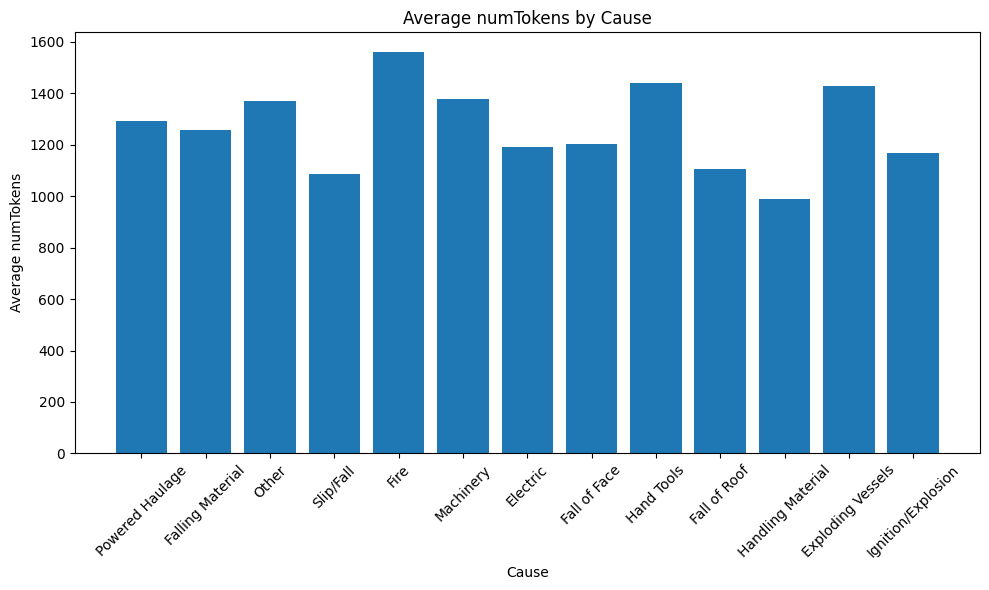

In [36]:
avg_num_tokens = []

for cause in causes:
    avg_num_tokens.append(data[data['cause'] == cause]['numTokens'].mean())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(causes, avg_num_tokens)
plt.xlabel('Cause')
plt.ylabel('Average numTokens')
plt.title('Average numTokens by Cause')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

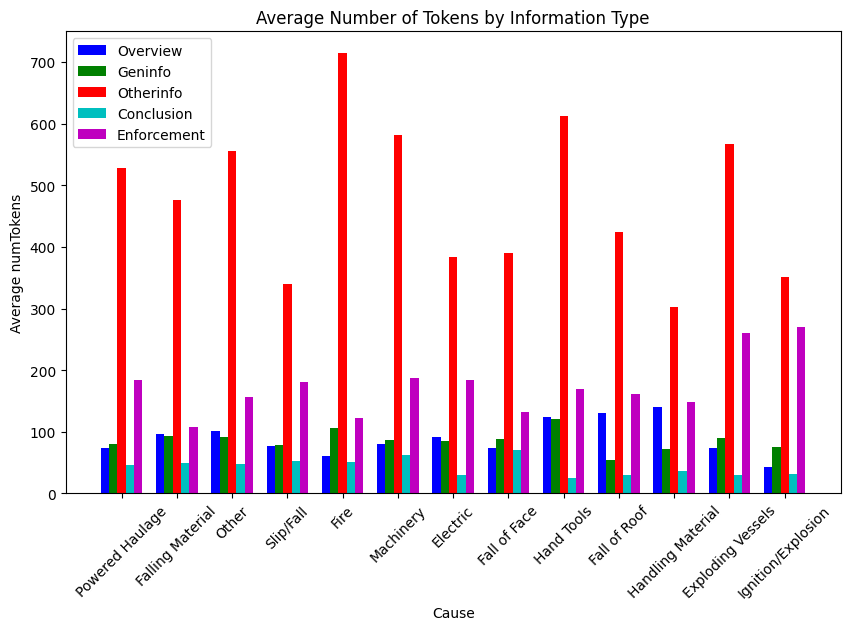

In [37]:
# Get the unique causes
causes = list(data['cause'].unique())

# Calculate the average token counts for each cause and token type
avg_num_tokens_overview = []
avg_num_tokens_geninfo = []
avg_num_tokens_otherinfo = []
avg_num_tokens_conclusion = []
avg_num_tokens_enforcement = []

for cause in causes:
    avg_num_tokens_overview.append(data[data['cause'] == cause]['numTokens_overview'].mean())
    avg_num_tokens_geninfo.append(data[data['cause'] == cause]['numTokens_geninfo'].mean())
    avg_num_tokens_otherinfo.append(data[data['cause'] == cause]['numTokens_otherinfo'].mean())
    avg_num_tokens_conclusion.append(data[data['cause'] == cause]['numTokens_conclusion'].mean())
    avg_num_tokens_enforcement.append(data[data['cause'] == cause]['numTokens_enforcement'].mean())

# Set the width of each bar
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(causes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(r1, avg_num_tokens_overview, color='b', width=bar_width, label='Overview')
plt.bar(r2, avg_num_tokens_geninfo, color='g', width=bar_width, label='Geninfo')
plt.bar(r3, avg_num_tokens_otherinfo, color='r', width=bar_width, label='Otherinfo')
plt.bar(r4, avg_num_tokens_conclusion, color='c', width=bar_width, label='Conclusion')
plt.bar(r5, avg_num_tokens_enforcement, color='m', width=bar_width, label='Enforcement')

plt.xlabel('Cause')
plt.ylabel('Average numTokens')
plt.title('Average Number of Tokens by Information Type')
plt.xticks([r + bar_width * 2 for r in range(len(causes))], causes, rotation=45)
plt.legend()

# Display the chart
plt.show()

Pull out the month from each and look at EDA for that 

### Wordclouds for Each Cause Type

In [38]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

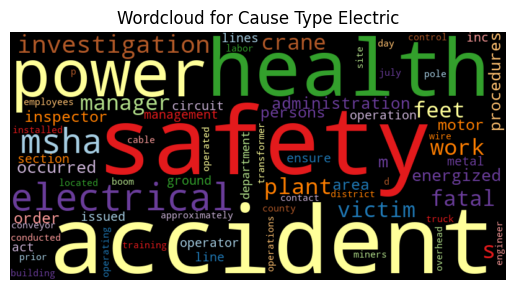

In [39]:
word_count = count_words(data[data['cause'] == 'Electric'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Electric", max_words=70, stopwords=None)

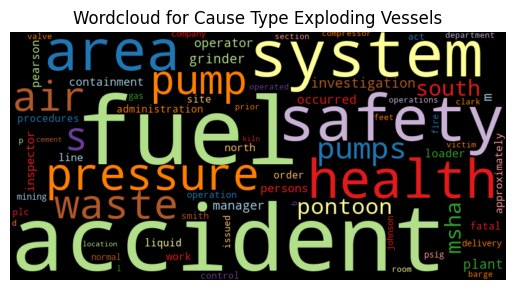

In [40]:
word_count = count_words(data[data['cause'] == 'Exploding Vessels'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Exploding Vessels", max_words=70, stopwords=None)

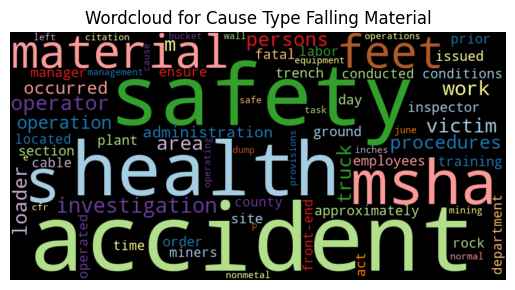

In [41]:
word_count = count_words(data[data['cause'] == 'Falling Material'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Falling Material", max_words=70, stopwords=None)

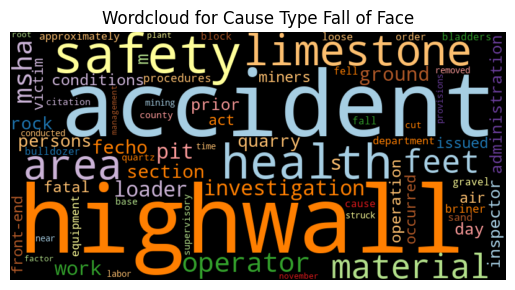

In [42]:
word_count = count_words(data[data['cause'] == 'Fall of Face'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Fall of Face", max_words=70, stopwords=None)

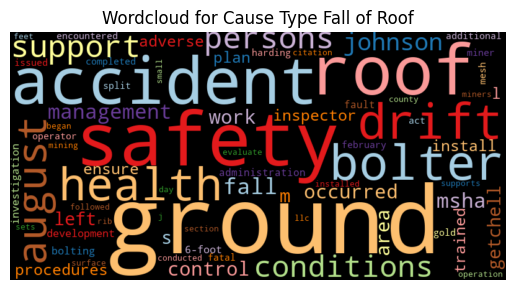

In [43]:
word_count = count_words(data[data['cause'] == 'Fall of Roof'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Fall of Roof", max_words=70, stopwords=None)

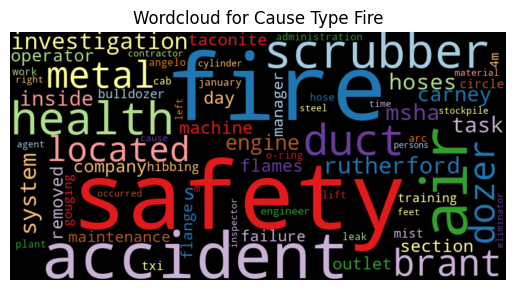

In [44]:
word_count = count_words(data[data['cause'] == 'Fire'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Fire", max_words=70, stopwords=None)

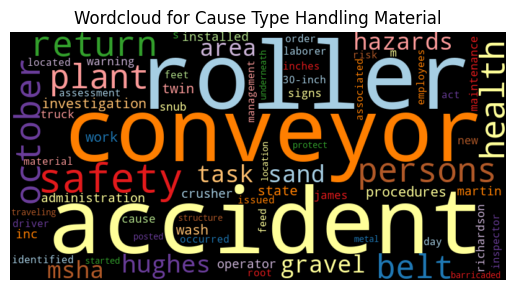

In [45]:
word_count = count_words(data[data['cause'] == 'Handling Material'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Handling Material", max_words=70, stopwords=None)

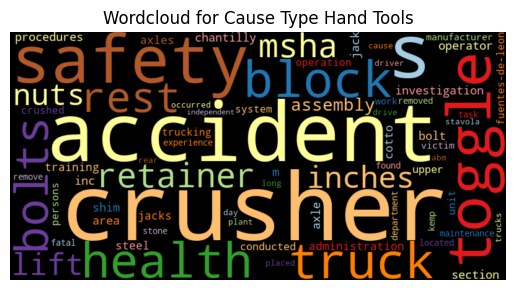

In [46]:
word_count = count_words(data[data['cause'] == 'Hand Tools'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Hand Tools", max_words=70, stopwords=None)

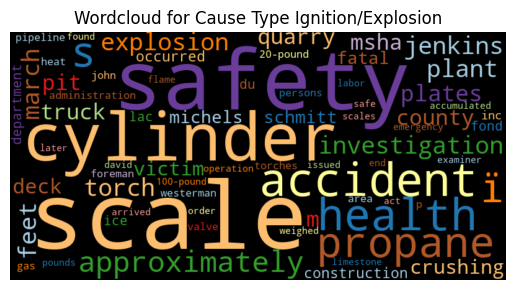

In [47]:
word_count = count_words(data[data['cause'] == 'Ignition/Explosion'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Ignition/Explosion", max_words=70, stopwords=None)

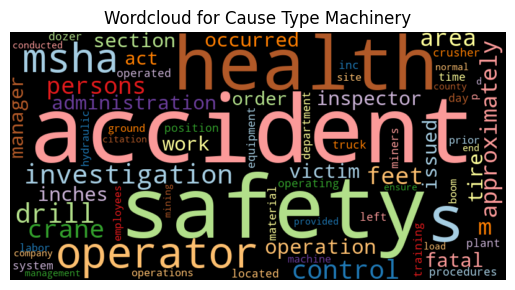

In [48]:
word_count = count_words(data[data['cause'] == 'Machinery'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Machinery", max_words=70, stopwords=None)

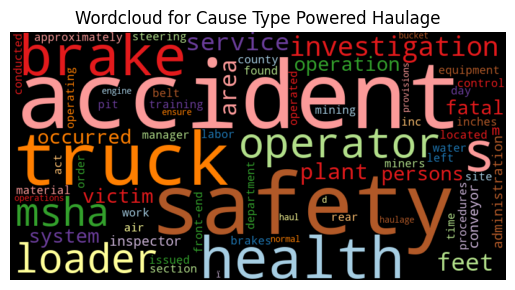

In [49]:
word_count = count_words(data[data['cause'] == 'Powered Haulage'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Powered Haulage", max_words=70, stopwords=None)

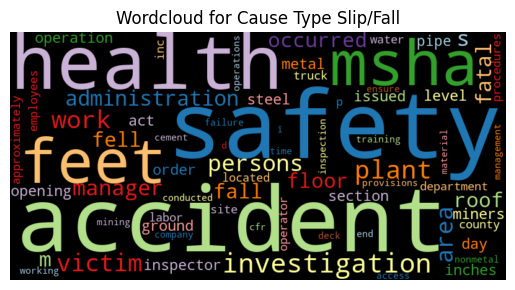

In [50]:
word_count = count_words(data[data['cause'] == 'Slip/Fall'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Slip/Fall", max_words=70, stopwords=None)

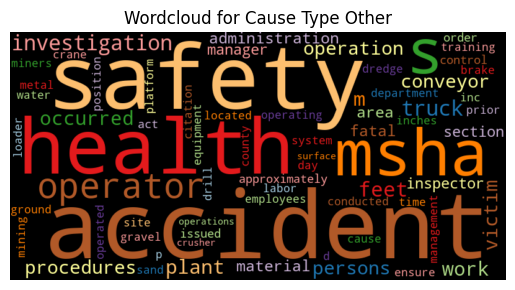

In [51]:
word_count = count_words(data[data['cause'] == 'Other'], column='tokens')
wordcloud(word_count['freq'], title="Wordcloud for Cause Type Other", max_words=70, stopwords=None)

Note: All the wordclouds by accident type contain the words accident, safety, health, msha, and more at the highest frequency. The lower frequency most common words are related to each type of accident that occured.

# Modeling



## Naive Bayes
- Build a classification model and report the accuracy of your model against a hold-out test set


In [52]:
# Change the data into a list of tuples similar to how it was in the assignment

nb_data= [(row['cleantext'], row['cause']) for _, row in data.dropna()[['cause', 'cleantext']].iterrows()]

In [53]:
# Only using tokens that occur word_cutoff number of times - for feature reduction
word_cutoff = 5

tokens = [w for t, p in nb_data for w in t.split()]

word_dist = nltk.FreqDist(tokens)

feature_words = set()

for word, count in word_dist.items() :
    if count > word_cutoff :
        feature_words.add(word)
        
print(f"With a word cutoff of {word_cutoff}, we have {len(feature_words)} as features in the model.")


With a word cutoff of 5, we have 4965 as features in the model.


In [54]:
def data_features(text, fw):

    ret_dict = {}
    words = text.split()

    for word in words:
        if word in fw:
            ret_dict[word] = True

    return ret_dict

In [55]:
featuresets = [(data_features(text,feature_words), cause) for (text, cause) in nb_data]

In [56]:
# Set up for NaiveBayes Model
random.seed(509)
random.shuffle(featuresets)

# Using 20/80 test/train split 
test_size = int(len(nb_data) * 0.20)

# Fit and train NaiveBayes Model
test_set, train_set = featuresets[:test_size], featuresets[test_size:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

# Show most informative features
classifier.show_most_informative_features(25)

0.0
Most Informative Features
                    burn = True             Fire : Other  =     34.4 : 1.0
                  burned = True             Fire : Other  =     34.4 : 1.0
                 chamber = True           Explod : Other  =     34.4 : 1.0
                  energy = True           Explod : Other  =     34.4 : 1.0
            extinguisher = True             Fire : Other  =     34.4 : 1.0
                 adverse = True           Fall o : Other  =     31.0 : 1.0
                    apex = True           Fall o : Other  =     31.0 : 1.0
                    beds = True           Fall o : Other  =     31.0 : 1.0
                  canopy = True           Fall o : Other  =     31.0 : 1.0
                  cavity = True           Fall o : Other  =     31.0 : 1.0
                  course = True           Fall o : Other  =     31.0 : 1.0
                detected = True           Fall o : Other  =     31.0 : 1.0
                footwall = True           Fall o : Other  =     31.0 :

#### Classification

In [57]:
# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()

# Extract the tweet texts and parties from tweet_data_sample
texts = [text for text, _ in nb_data]
causes = [cause for _, cause in nb_data]

# Convert the tweet texts into numerical features
X = vectorizer.fit_transform(texts )

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X, causes)

# Predict the party for each tweet and print the results
for text, cause in nb_data:
    texts_text = text
    # Convert the tweet text into numerical features
    X_tweet = vectorizer.transform([texts_text])
    # Predict the party using the trained classifier
    predicted_cause= classifier.predict(X_tweet)[0]
    
    #print(f"Here's our (cleaned) text: {texts_text}")
    print(f"Actual cause is {cause} and our classifier says {predicted_cause}.")
    print("")

Actual cause is Falling Material and our classifier says Falling Material.

Actual cause is Powered Haulage and our classifier says Powered Haulage.

Actual cause is Other and our classifier says Other.

Actual cause is Slip/Fall and our classifier says Slip/Fall.

Actual cause is Fire and our classifier says Other.

Actual cause is Powered Haulage and our classifier says Powered Haulage.

Actual cause is Other and our classifier says Other.

Actual cause is Machinery and our classifier says Machinery.

Actual cause is Other and our classifier says Other.

Actual cause is Other and our classifier says Other.

Actual cause is Other and our classifier says Other.

Actual cause is Other and our classifier says Other.

Actual cause is Machinery and our classifier says Powered Haulage.

Actual cause is Powered Haulage and our classifier says Powered Haulage.

Actual cause is Other and our classifier says Other.

Actual cause is Powered Haulage and our classifier says Powered Haulage.

Actua

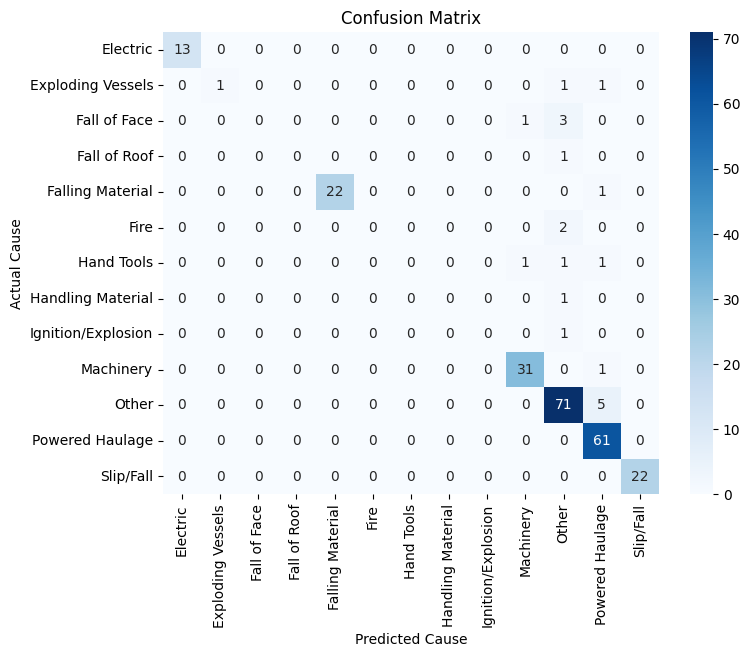

In [58]:
# Predict the cause for each tweet
predicted_causes = classifier.predict(X)

# Generate the confusion matrix
confusion_mat = confusion_matrix(causes, predicted_causes)

# Get the class labels from the classifier
class_labels = classifier.classes_

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cause")
plt.ylabel("Actual Cause")
plt.show()


## Topic Modeling
- Ignore the groups and build a topic model such as NMF, LSA, or LDA to put the data into groups. 
- Compare how well those topics agree with the a priori groups

In [59]:
tm_data = data.dropna()[['cause', 'cleantext']]

# Let's add some helpful columns on the df
tm_data['char_len'] = tm_data['cleantext'].apply(len)
tm_data['word_len'] = tm_data['cleantext'].apply(lambda x: len(x.split()))
tm_data

cause                                          cleantext  \
1    Falling Material  msha metalnonmetal mine fatal accident investi...   
2     Powered Haulage  msha metal and nonmetal mine fatal accident in...   
3               Other  msha metal and nonmetal mine fatal accident in...   
4           Slip/Fall  msha metal and nonmetal mine fatal accident in...   
5                Fire  msha metal and nonmetal mine fatal accident in...   
..                ...                                                ...   
241  Falling Material  msha metal and nonmetal mine fatal accident in...   
242             Other  msha metal and nonmetal mine fatal accident in...   
243             Other  msha metal and nonmetal mine fatal accident in...   
244  Falling Material  msha metal and nonmetal mine fatal accident in...   
245  Falling Material  msha metal and nonmetal mine fatal accident in...   

     char_len  word_len  
1       12017      1934  
2       13906      2304  
3       13228      2117  
4       12770      2173  
5       17588      2848  
..        ...       ...  
241      7493      1183  
242     28039      4456  
243      8524      1347  
244      7303      1183  
245      7516      1246  

[242 rows x 4 columns]

<AxesSubplot: xlabel='cause'>

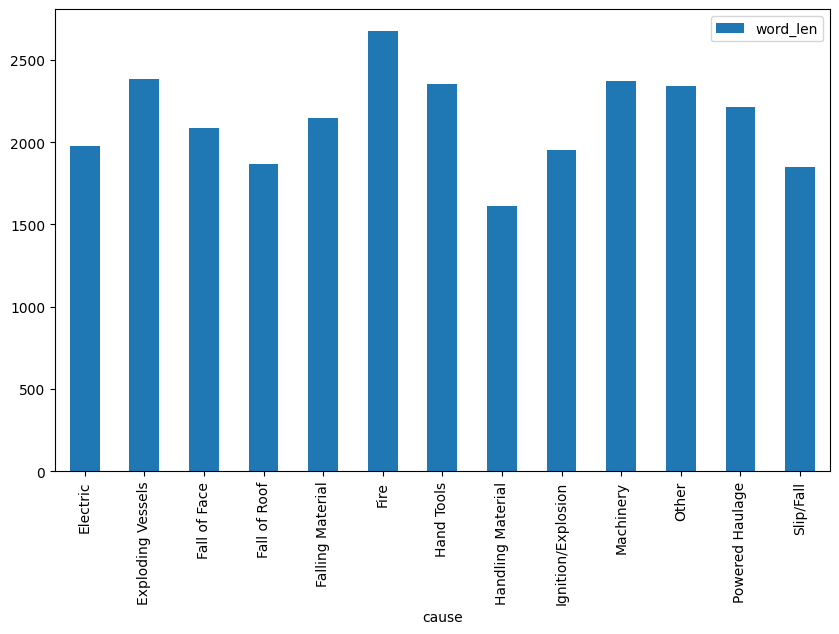

In [60]:
tm_data.groupby('cause').agg({'word_len': 'mean'}).plot.bar(figsize=(10,6))

TF-IDF and Count Vectorizations 

In [61]:
count_text_vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(tm_data["cleantext"])
print("count_text_vectors", count_text_vectors.shape)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(tm_data['cleantext'])
print("tfidf_text_vectors", tfidf_text_vectors.shape)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


count_text_vectors (242, 3348)
tfidf_text_vectors (242, 3348)


Function for displaying topics from topic models

In [62]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

### Non_Negative Matrix Factorization Model 

In [63]:
nmf_text_model = NMF(13, random_state=509)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  brake (4.61)
  service (1.62)
  brakes (1.22)
  steering (1.13)
  air (1.08)

Topic 01
  conveyor (4.84)
  pulley (2.42)
  belt (2.38)
  tail (1.47)
  roller (0.98)

Topic 02
  drill (9.11)
  leveling (1.57)
  jack (1.43)
  drilling (1.27)
  jacks (1.02)

Topic 03
  bin (2.62)
  locomotive (2.42)
  rail (2.25)
  railcars (1.89)
  railcar (1.29)

Topic 04
  dredge (6.11)
  water (2.28)
  sand (1.98)
  boat (1.98)
  pond (1.51)

Topic 05
  crane (6.05)
  boom (1.91)
  hoist (1.09)
  lift (0.92)
  load (0.87)

Topic 06
  loader (3.45)
  bucket (1.91)
  frontend (0.99)
  stone (0.69)
  seat (0.57)

Topic 07
  highwall (6.53)
  pit (1.23)
  gravel (0.91)
  bench (0.87)
  excavator (0.85)

Topic 08
  dozer (5.58)
  dragline (0.85)
  blade (0.81)
  ramp (0.81)
  trench (0.73)

Topic 09
  electrical (2.43)
  power (1.78)
  circuit (1.74)
  motor (1.19)
  energized (1.05)

Topic 10
  platform (0.76)
  pipe (0.75)
  tank (0.64)
  floor (0.55)
  opening (0.55)

Topic 11
  roof (3.40)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Compare the NMF factorization to the original categories from our data

In [64]:
# Let's go document by document and make a list of tm_data causes by topic
topic_to_category = defaultdict(list)
for idx, row in enumerate(W_text_matrix) : 
    topic = np.where(row == np.amax(row))[0]
    category = tm_data["cause"].iloc[idx]
    
    topic_to_category[topic[0]].append(category)

# Creating topic_counts dictionary  
topic_counts = {}
for topics, categories in topic_to_category.items():
    # Creating category_counts dictionary for each topic 
    category_counts = {}
    for category in categories:
        # Getting the categories for each topic 
        # get(dict, 0) + 1 gets the categories for each topic and increments the 
        # tally by one if the category has already been gotten
        category_counts[category] = category_counts.get(category, 0) + 1
    # Storing values 
    topic_counts[topics] = category_counts

display(topic_counts)


{10: {'Falling Material': 7,
  'Other': 20,
  'Machinery': 6,
  'Slip/Fall': 13,
  'Hand Tools': 2,
  'Powered Haulage': 1,
  'Fire': 1,
  'Fall of Face': 1,
  'Exploding Vessels': 2,
  'Electric': 1,
  'Ignition/Explosion': 1},
 3: {'Powered Haulage': 4, 'Other': 3, 'Falling Material': 1},
 1: {'Slip/Fall': 1,
  'Powered Haulage': 11,
  'Other': 8,
  'Handling Material': 1,
  'Falling Material': 1},
 8: {'Fire': 1, 'Falling Material': 4, 'Other': 1, 'Machinery': 4},
 12: {'Powered Haulage': 14,
  'Machinery': 3,
  'Other': 8,
  'Slip/Fall': 3,
  'Falling Material': 3,
  'Hand Tools': 1},
 11: {'Other': 5,
  'Machinery': 1,
  'Slip/Fall': 5,
  'Fall of Roof': 1,
  'Powered Haulage': 6,
  'Electric': 1},
 6: {'Machinery': 4,
  'Other': 3,
  'Powered Haulage': 10,
  'Falling Material': 4,
  'Exploding Vessels': 1},
 9: {'Other': 3, 'Electric': 9, 'Machinery': 2, 'Falling Material': 1},
 0: {'Powered Haulage': 14, 'Other': 3},
 4: {'Other': 10, 'Machinery': 1, 'Powered Haulage': 1},
 7: {

Interpretation of nmf topic model:
The NMF model identified 13 distinct topics in the corpus. From the output above, we can see that topic 0 contains reports from the powered haulage and other cause categories, topic 1 contains reports from the slip/fall, powered haulage, other, handling material, and falling material cause categories, topic 2 contains reports from the other, machinery, and falling material cause categories, topic 3 contains reports from the powered haulage, other, and falling material cause categories, topic 4 contains articles from the other, machinery, and powered haulage cause categories, topic 5 contains reports from the other, electric, and machinery cause categories, topic 6 contains reports from the machinery, other, powered haulage, falling material, and exploding vessels cause categories, topic 7 contains reports from the machinery, other, fall of face, and falling material cause categories, topic 8 contains reports from the fire, falling material, other, and machinery cause categories, topic 9 contains reports from the other, electric, machinery, and falling material cause categories, topic 10 contains reports from falling material, other, machinery, slip/fall, hand tools, powered haulage, fire, fall of face, exploding vessels, electric, and ignition/explosion cause categories, topic 11 contains reports from the other, machinery, slip/fall, fall of roof, powered haulage, and electric cause categories, and topic 12 contains reports from powered haulage, machinery, other, slip/fall, falling material, and hand tools cause categories.

Interestingly, the words that make up each topic do not seem to overlap between the 13 topics, visualized in the wordclouds below. Also, the words that make up each topic seem to contribute a little to each topic (for example, the word 'drill' contributes around 9% to topic). Given the wordclouds and the percentage contributions fo the words to the respective topic, I would've expected better performance of the nmf topic modeling. One possible explanation is that the reports themselves all have the same document formatting, introducing a set of words that is the same in every report (i.e., safety, health, accident, etc.). This could make it hard for the topic model to identify an accident cause from the defined topics because the reports are so similar outside of the accident cause related words. Also, the main issue seems to be comiing from the other category, which makes sense because there are likely accidents of all 13 causes in the other category.


In [65]:
# Wordcloud to visualize topic models
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

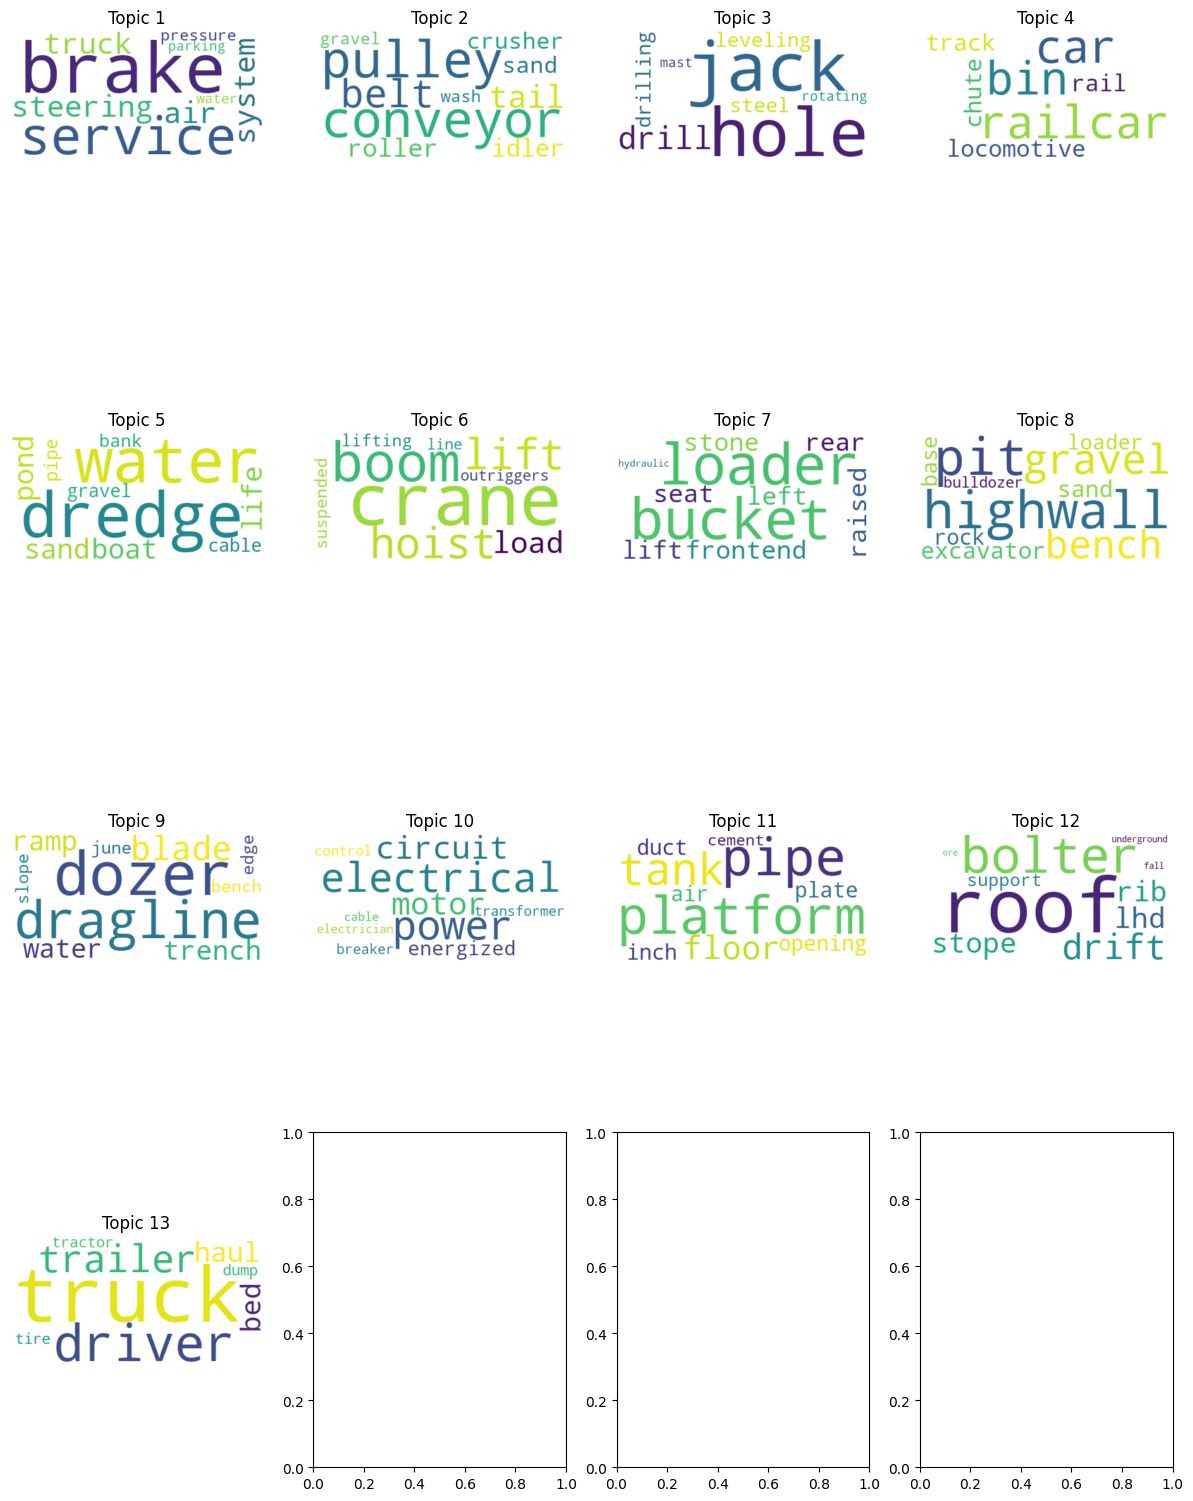

In [66]:
top_words_per_topic = nmf_text_model.components_

# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 20))

# Iterate over the topics
for i, topic_words in enumerate(top_words_per_topic):
    # Determine the subplot location in the grid
    row = i // 4
    col = i % 4
    
    # Get the top words for the current topic
    top_words = [tfidf_text_vectorizer.get_feature_names_out()[word_index] for word_index in topic_words.argsort()[:-11:-1]]
    
    # Concatenate the top words for the topic
    wordcloud_text = ' '.join(top_words)
    
    # Create a word cloud for the topic
    wordcloud = WordCloud(background_color='white').generate(wordcloud_text)
    
    # Plot the word cloud in the corresponding subplot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f"Topic {i+1}")
    axes[row, col].axis('off')

# Display the plot
plt.show()


### LSA Model 

In [67]:
lsa_model = TruncatedSVD(n_components=13, random_state=509)
lsa_text_matrix = lsa_model.fit_transform(tfidf_text_vectors)

display_topics(lsa_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  brake (0.83)
  truck (0.77)
  loader (0.54)
  conveyor (0.47)
  service (0.38)

Topic 01
  brake (4.81)
  truck (2.78)
  service (1.77)
  brakes (1.53)
  steering (1.36)

Topic 02
  drill (7.05)
  highwall (2.36)
  leveling (1.28)
  jack (1.17)
  drilling (1.12)

Topic 03
  drill (12.33)
  conveyor (6.60)
  pulley (4.08)
  belt (3.67)
  tail (2.48)

Topic 04
  dredge (14.02)
  highwall (6.84)
  sand (6.29)
  loader (5.99)
  water (5.62)

Topic 05
  crane (7.11)
  loader (3.48)
  drill (2.49)
  boom (2.35)
  brake (1.59)

Topic 06
  loader (10.35)
  highwall (7.57)
  bucket (6.39)
  dozer (5.77)
  frontend (3.10)

Topic 07
  highwall (15.31)
  truck (14.32)
  trailer (11.39)
  dozer (8.45)
  crane (6.33)

Topic 08
  dozer (32.94)
  electrical (23.14)
  power (17.32)
  circuit (17.13)
  highwall (13.99)

Topic 09
  electrical (37.56)
  loader (36.73)
  circuit (27.38)
  power (23.06)
  trailer (17.99)

Topic 10
  roof (8.93)
  truck (6.81)
  bolter (5.77)
  drift (4.86)
  lhd

In [68]:
# Let's go document by document and make a list of tm_data causes by topic
topic_to_category = defaultdict(list)
for idx, row in enumerate(lsa_text_matrix) : 
    topic = np.where(row == np.amax(row))[0]
    category = tm_data["cause"].iloc[idx]
    
    topic_to_category[topic[0]].append(category)

# Creating topic_counts dictionary  
topic_counts = {}
for topics, categories in topic_to_category.items():
    # Creating category_counts dictionary for each topic 
    category_counts = {}
    for category in categories:
        # Getting the categories for each topic 
        # get(dict, 0) + 1 gets the categories for each topic and increments the 
        # tally by one if the category has already been gotten
        category_counts[category] = category_counts.get(category, 0) + 1
    # Storing values 
    topic_counts[topics] = category_counts

display(topic_counts)


{0: {'Falling Material': 21,
  'Powered Haulage': 58,
  'Other': 50,
  'Slip/Fall': 18,
  'Fire': 2,
  'Machinery': 19,
  'Electric': 5,
  'Hand Tools': 3,
  'Handling Material': 1,
  'Fall of Face': 1,
  'Exploding Vessels': 3,
  'Ignition/Explosion': 1},
 8: {'Other': 4, 'Electric': 5, 'Machinery': 2, 'Falling Material': 1},
 3: {'Powered Haulage': 2},
 4: {'Other': 9, 'Machinery': 1},
 7: {'Machinery': 1, 'Fall of Face': 2, 'Other': 1},
 10: {'Other': 3, 'Fall of Roof': 1},
 2: {'Other': 4, 'Machinery': 4, 'Falling Material': 1},
 5: {'Electric': 2, 'Machinery': 4, 'Other': 2},
 11: {'Slip/Fall': 3, 'Other': 2},
 12: {'Powered Haulage': 1, 'Machinery': 1, 'Other': 1, 'Slip/Fall': 1},
 9: {'Electric': 1},
 6: {'Fall of Face': 1}}

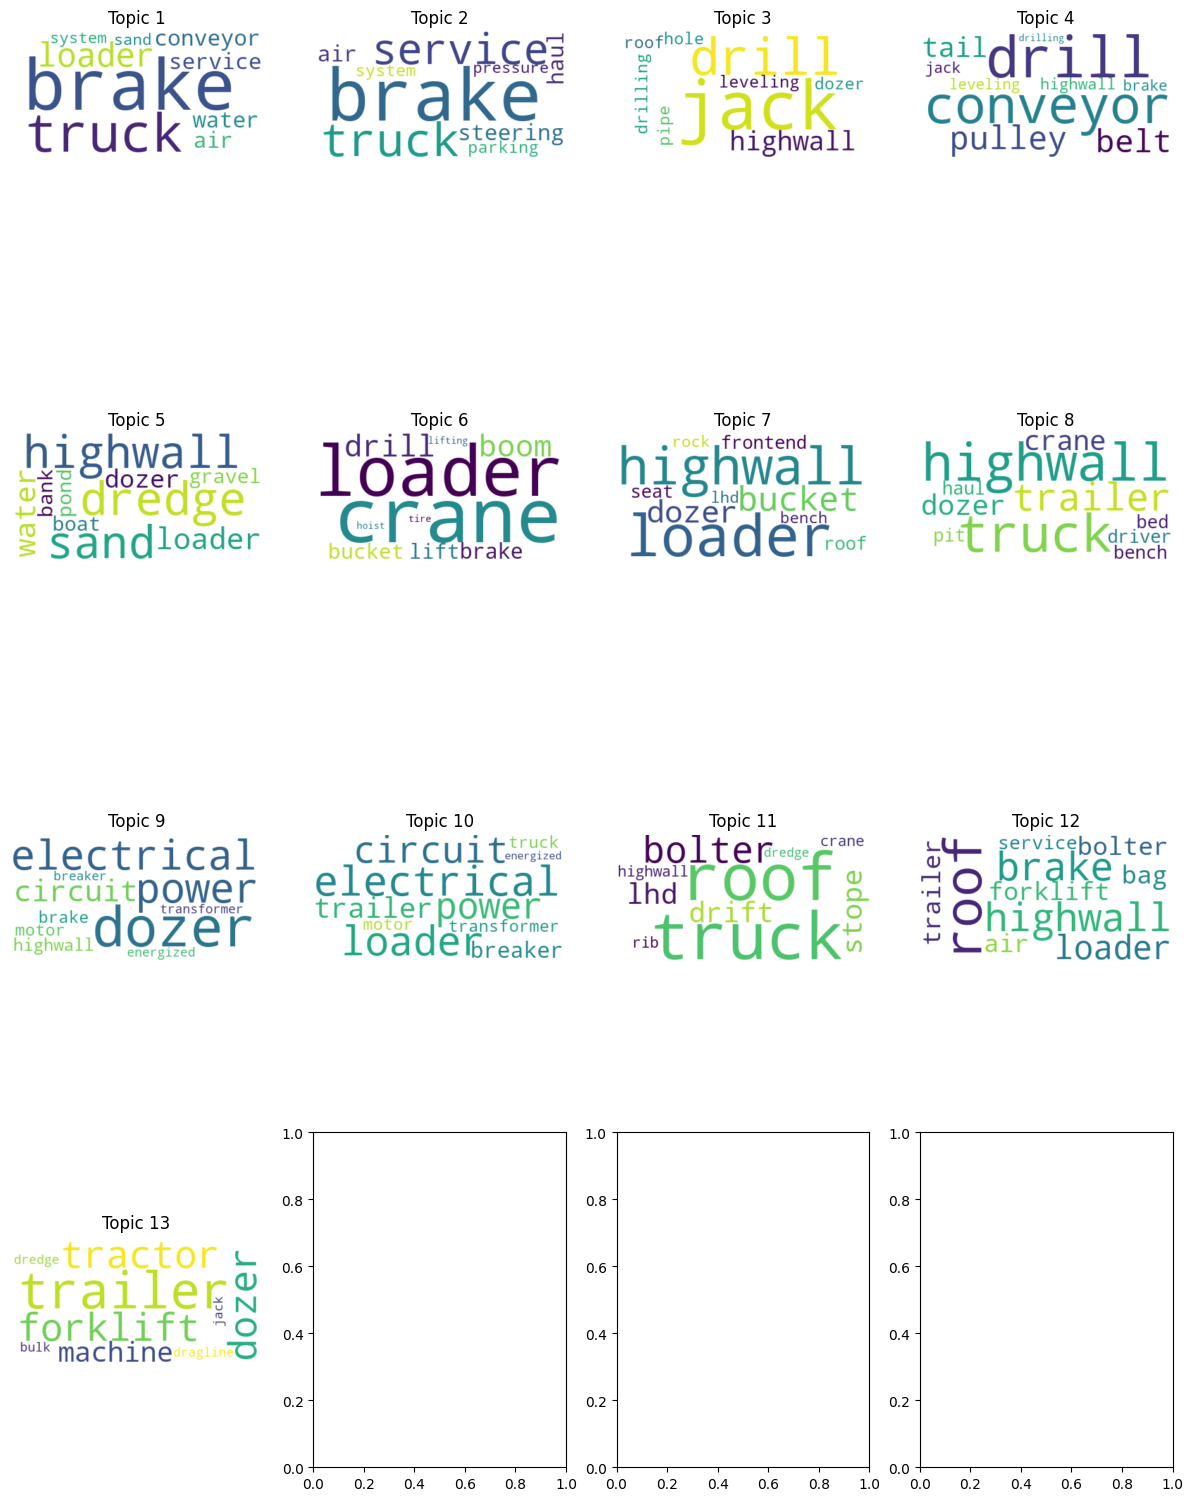

In [69]:
top_words_per_topic = lsa_model.components_

# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 20))

# Iterate over the topics
for i, topic_words in enumerate(top_words_per_topic):
    # Determine the subplot location in the grid
    row = i // 4
    col = i % 4
    
    # Get the top words for the current topic
    top_words = [tfidf_text_vectorizer.get_feature_names_out()[word_index] for word_index in topic_words.argsort()[:-11:-1]]
    
    # Concatenate the top words for the topic
    wordcloud_text = ' '.join(top_words)
    
    # Create a word cloud for the topic
    wordcloud = WordCloud(background_color='white').generate(wordcloud_text)
    
    # Plot the word cloud in the corresponding subplot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f"Topic {i+1}")
    axes[row, col].axis('off')

# Display the plot
plt.show()


### LDA Model

In [70]:
lda_model = LatentDirichletAllocation(n_components = 13, random_state = 314)
lda_text_matrix = lda_model.fit_transform(count_text_vectors)

display_topics(lda_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  loader (3.41)
  frontend (1.02)
  highwall (1.01)
  dozer (1.01)
  pit (0.81)

Topic 01
  dredge (3.24)
  sand (2.52)
  water (2.28)
  pipe (2.12)
  gravel (1.46)

Topic 02
  bag (1.44)
  stope (1.32)
  house (0.88)
  wall (0.83)
  maintenance (0.75)

Topic 03
  water (3.67)
  boat (1.63)
  beam (1.35)
  crane (1.15)
  unit (1.09)

Topic 04
  brake (6.24)
  service (2.63)
  system (2.02)
  brakes (1.53)
  steering (1.49)

Topic 05
  crusher (1.80)
  conveyor (1.53)
  plate (1.06)
  inch (0.90)
  end (0.80)

Topic 06
  drill (4.24)
  power (1.68)
  electrical (1.60)
  motor (1.58)
  control (1.15)

Topic 07
  sand (1.36)
  inc (1.23)
  trailer (1.12)
  tank (1.03)
  gravel (1.03)

Topic 08
  crane (3.54)
  boom (2.31)
  tire (1.85)
  machine (1.83)
  control (1.39)

Topic 09
  drift (0.98)
  underground (0.91)
  rail (0.90)
  miner (0.88)
  roof (0.81)

Topic 10
  bin (1.56)
  platform (1.47)
  system (1.32)
  air (0.97)
  fuel (0.95)

Topic 11
  conveyor (2.42)
  belt (1.73

In [71]:
# Let's go document by document and make a list of tm_data causes by topic
topic_to_category = defaultdict(list)
for idx, row in enumerate(lda_text_matrix) : 
    topic = np.where(row == np.amax(row))[0]
    category = tm_data["cause"].iloc[idx]
    
    topic_to_category[topic[0]].append(category)

# Creating topic_counts dictionary  
topic_counts = {}
for topics, categories in topic_to_category.items():
    # Creating category_counts dictionary for each topic 
    category_counts = {}
    for category in categories:
        # Getting the categories for each topic 
        # get(dict, 0) + 1 gets the categories for each topic and increments the 
        # tally by one if the category has already been gotten
        category_counts[category] = category_counts.get(category, 0) + 1
    # Storing values 
    topic_counts[topics] = category_counts

display(topic_counts)


{9: {'Falling Material': 1,
  'Powered Haulage': 3,
  'Machinery': 2,
  'Other': 6,
  'Fall of Roof': 1,
  'Slip/Fall': 3},
 11: {'Other': 12,
  'Slip/Fall': 13,
  'Powered Haulage': 7,
  'Handling Material': 1,
  'Fire': 1,
  'Falling Material': 1,
  'Electric': 1},
 0: {'Fire': 1,
  'Machinery': 8,
  'Powered Haulage': 16,
  'Other': 7,
  'Fall of Face': 3,
  'Falling Material': 6},
 12: {'Powered Haulage': 13,
  'Other': 8,
  'Falling Material': 3,
  'Hand Tools': 1,
  'Slip/Fall': 1},
 3: {'Other': 6, 'Machinery': 2, 'Electric': 1},
 5: {'Other': 11,
  'Falling Material': 4,
  'Hand Tools': 2,
  'Powered Haulage': 4,
  'Slip/Fall': 1,
  'Machinery': 3,
  'Ignition/Explosion': 1},
 7: {'Other': 4,
  'Machinery': 5,
  'Slip/Fall': 3,
  'Powered Haulage': 1,
  'Electric': 1},
 6: {'Other': 8, 'Electric': 9, 'Machinery': 2, 'Falling Material': 2},
 1: {'Slip/Fall': 1,
  'Other': 4,
  'Machinery': 2,
  'Powered Haulage': 1,
  'Falling Material': 2},
 10: {'Falling Material': 2,
  'Other

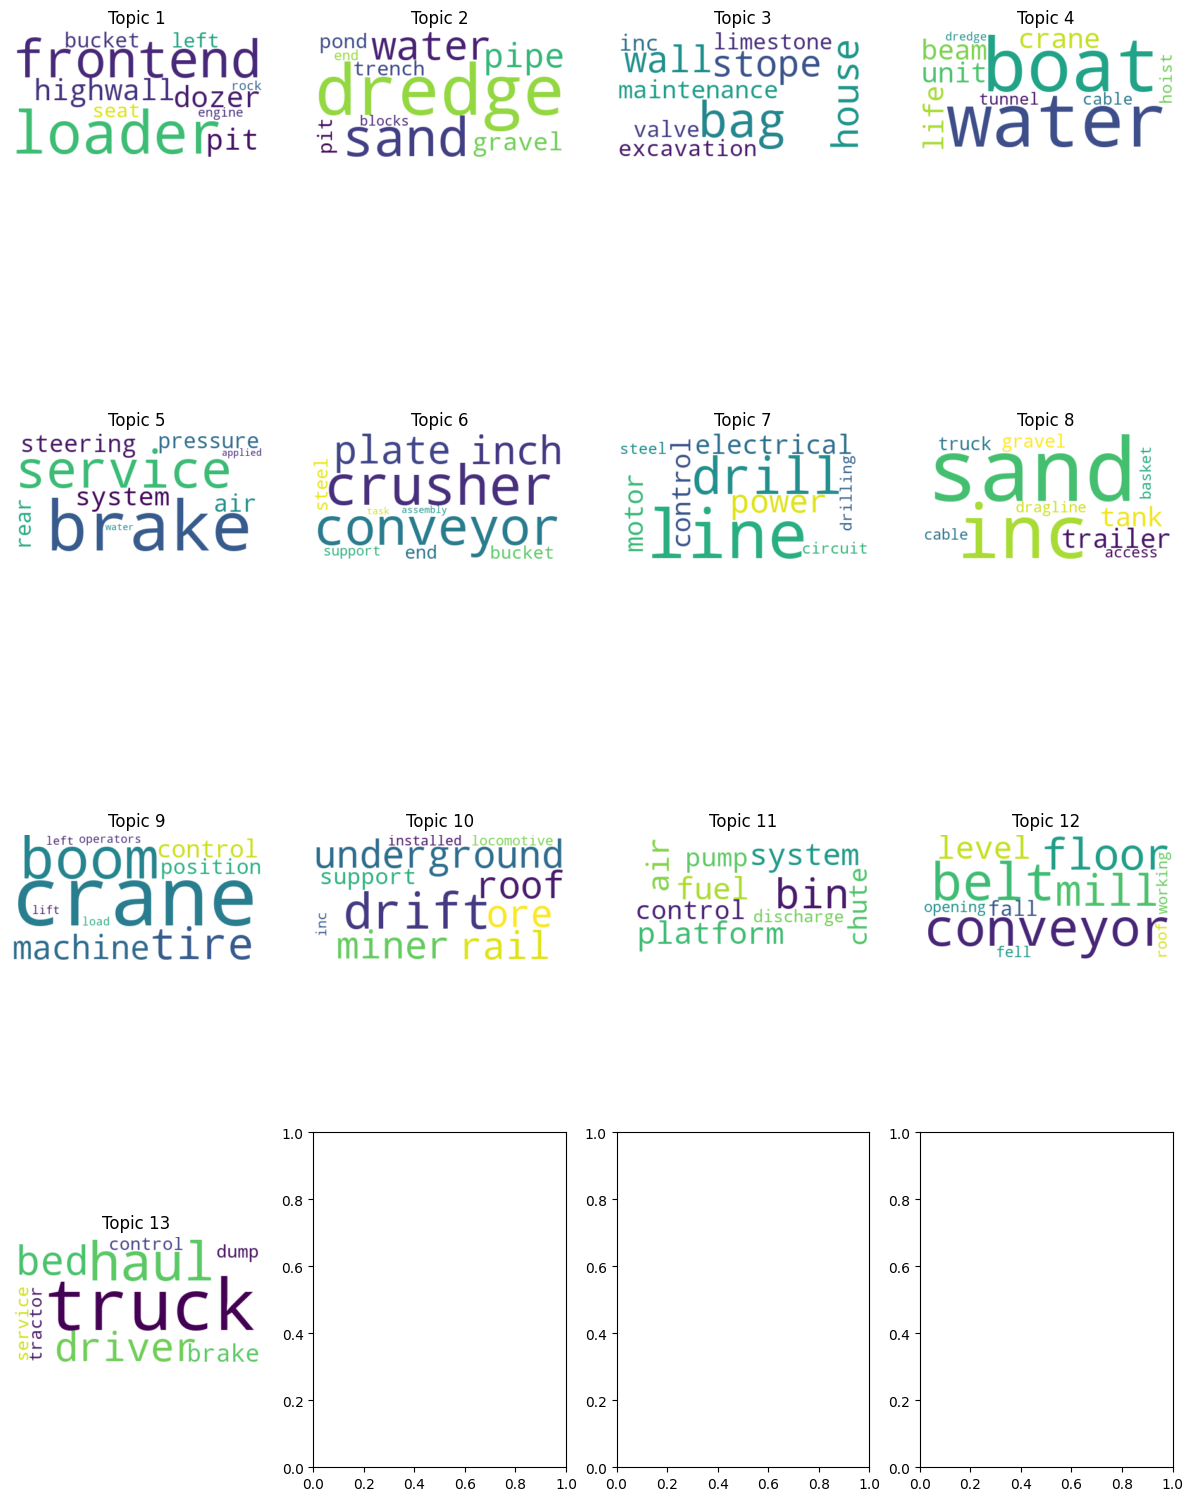

In [72]:
top_words_per_topic = lda_model.components_

# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 20))

# Iterate over the topics
for i, topic_words in enumerate(top_words_per_topic):
    # Determine the subplot location in the grid
    row = i // 4
    col = i % 4
    
    # Get the top words for the current topic
    top_words = [tfidf_text_vectorizer.get_feature_names_out()[word_index] for word_index in topic_words.argsort()[:-11:-1]]
    
    # Concatenate the top words for the topic
    wordcloud_text = ' '.join(top_words)
    
    # Create a word cloud for the topic
    wordcloud = WordCloud(background_color='white').generate(wordcloud_text)
    
    # Plot the word cloud in the corresponding subplot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f"Topic {i+1}")
    axes[row, col].axis('off')

# Display the plot
plt.show()


In [73]:
lda_display = pyLDAvis.lda_model.prepare(lda_model, count_text_vectors, count_text_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

Final Thoughts:
The three topic models (nmf, lsa, and lda) all perform okay on the corpus. If we have to pick from the three I would say the lsa topic model performed best, being able to identify 3 groups from the a priori groups and on average 2-3 accident cause categories for majority of the topics, whereas the other two topic models identified more, on average, accident cause categories for each topic and none of the a priori groups. Interestingly, the LSA model did have intersecting words but on average much higher percentage importance scores than the other two topic models. To improve the performance of our topic models, we propose to create a sublist of words that is removed during the cleaning phase. This sublist of words could contain the most common words shared across all the reports (i.e., accident, safety, msha, etc.) or words deemed removeable by domain experts. By removing the sublist of words, the goal is to create more diversity amongst the reports making it easier for the topic models to identify an accident cause from the topics.

### References:
Albrecht, J., Ramachandran, S., & Winkler, C. (2020). Blueprints for text analytics using Python. O'Reilly.

MSHA - Metal and Nonmetal Preliminary Accident Reports, Fatal Alert Bulletins and Investigation Reports. (n.d.). https://arlweb.msha.gov/fatals/fabmc-1995-2007.htm

OpenAI ChatGPT Documentation.OpenAI. Accessed: June 20, 2023. URL: https://chat.openai.com/
